# Reddit Classification Problem

## Laura Minter
### November 2021

### Notebook 03: Exploratory Data Analysis
This notebook assumes that the previous [data cleaning notebook](./02_data_cleaning.ipynb) was succesfully run and that correct cleaned data is stored in the `./data` folder using the `<subreddit_name>_cleaned.csv` style filename. 

#### Problem statement
Identify common and disparate themes in the reddit posts to for Portland and Seattle subreddits that could be useful for marketing campaigns across the Pacific Northwest.  


In [1]:
#imports
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
sea = pd.read_csv('./data/Seattle/seattle_cleaned.csv')
sea['r_seattlewa'] = 0
sea['r_portland'] = 0
sea['from_seattle'] = 1
sea['from_portland'] = 0

In [3]:
wa = pd.read_csv('./data/SeattleWA/seattlewa_cleaned.csv')
wa['r_seattlewa'] = 1
wa['r_portland'] = 0
wa['from_seattle'] = 1
wa['from_portland'] = 0

In [4]:
pdx = pd.read_csv('./data/Portland/portland_cleaned.csv')
pdx['r_seattlewa'] = 0
pdx['r_portland'] = 1
pdx['from_seattle'] = 0
pdx['from_portland'] = 1

In [5]:
df = pd.concat([sea,wa, pdx],axis = 0)

In [6]:
df.drop(columns = 'Unnamed: 0', inplace = True)

df['fulltext'] = df['title'].map(str) + df['selftext'].map(str)

In [7]:
df.head()


selftext                                              title          author  \
0      NaN  Driver in Summer Taylor vehicular homicide cas...  OnlineMemeArmy   
1      NaN  Another stormy day brings high winds, landslid...  OnlineMemeArmy   
2      NaN  Gender-fluid dancer breaks barriers at Pacific...  OnlineMemeArmy   
3      NaN  Logistics proving to be biggest challenge for ...  OnlineMemeArmy   
4      NaN  Tribes, preservation societies join lawsuit to...  OnlineMemeArmy   

       id  r_seattlewa  r_portland  from_seattle  from_portland  \
0  kr0hh7            0           0             1              0   
1  kr0grd            0           0             1              0   
2  kr0dx9            0           0             1              0   
3  kr0c3t            0           0             1              0   
4  kr0b0m            0           0             1              0   

                                            fulltext  
0  Driver in Summer Taylor vehicular homicide cas...  
1  Another stormy day brings high winds, landslid...  
2  Gender-fluid dancer breaks barriers at Pacific...  
3  Logistics proving to be biggest challenge for ...  
4  Tribes, preservation societies join lawsuit to...

In [8]:
df['from_seattle'].value_counts()

0    149895
1    120705
Name: from_seattle, dtype: int64

In [9]:
df['r_portland'].value_counts()

1    149895
0    120705
Name: r_portland, dtype: int64

### Looking at the length of posts

In [10]:
sea['title_length'] = sea['title'].map(lambda x: len(str(x)))
sea['text_length'] = sea['selftext'].map(lambda x: len(str(x)))
sea['fulltext'] = sea['title'].map(str) + sea['selftext'].map(str)
sea['total_length'] = sea['fulltext'].map(lambda x: len(str(x)))

sea['title_words'] = sea['title'].map(lambda x: len(str(x).split()))
sea['text_words'] = sea['selftext'].map(lambda x: len(str(x).split()))
sea['fulltext_words'] = sea['title'].map(lambda x: len(str(x).split()))


In [11]:

wa['title_length'] = wa['title'].map(lambda x: len(str(x)))
wa['text_length'] = wa['selftext'].map(lambda x: len(str(x)))
wa['fulltext'] = wa['title'].map(str) + wa['selftext'].map(str)
wa['total_length'] = wa['fulltext'].map(lambda x: len(str(x)))

wa['title_words'] = wa['title'].map(lambda x: len(str(x).split()))
wa['text_words'] = wa['selftext'].map(lambda x: len(str(x).split()))
wa['fulltext_words'] = wa['title'].map(lambda x: len(str(x).split()))

In [12]:
pdx['title_length'] = pdx['title'].map(lambda x: len(str(x)))
pdx['text_length'] = pdx['selftext'].map(lambda x: len(str(x)))
pdx['fulltext'] = pdx['title'].map(str) + pdx['selftext'].map(str)
pdx['total_length'] = pdx['fulltext'].map(lambda x: len(str(x)))

pdx['title_words'] = pdx['title'].map(lambda x: len(str(x).split()))
pdx['text_words'] = pdx['selftext'].map(lambda x: len(str(x).split()))
pdx['fulltext_words'] = pdx['title'].map(lambda x: len(str(x).split()))

In [13]:
df['title_length'] = df['title'].map(lambda x: len(str(x)))
df['text_length'] = df['selftext'].map(lambda x: len(str(x)))
df['total_length'] = df['fulltext'].map(lambda x: len(str(x)))

df['title_words'] = df['title'].map(lambda x: len(str(x).split()))
df['text_words'] = df['selftext'].map(lambda x: len(str(x).split()))
df['fulltext_words'] = df['title'].map(lambda x: len(str(x).split()))

In [14]:
#removing linebreaks, links, like in our NLPII lesson.  
#get rid of links and line breaks

df['fulltext'] = df['fulltext'].replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True).replace('\n|S+', '', regex = True)

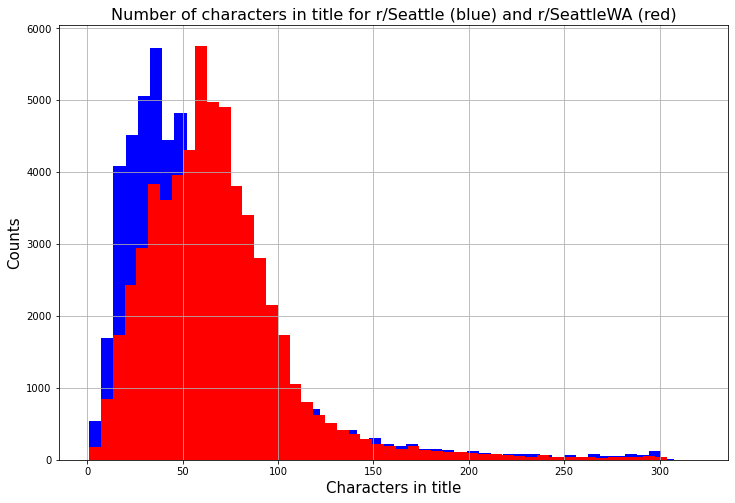

In [15]:
plt.figure(figsize=(12,8))
sea['title_length'].hist(bins = 50, color = 'b');
wa['title_length'].hist(bins = 50, color = 'r');
#pdx['title_length'].hist(bins = 50, color = 'orange');
plt.title('Number of characters in title for r/Seattle (blue) and r/SeattleWA (red)', size = 16)
plt.xlabel('Characters in title', size = 15);
plt.ylabel('Counts', size = 15);

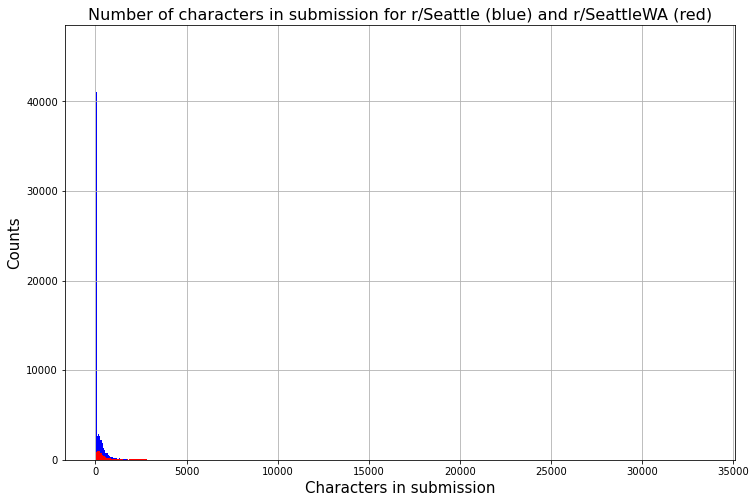

In [16]:
plt.figure(figsize=(12,8))
sea['text_length'].hist(bins = 500, color = 'b');
wa['text_length'].hist(bins = 500, color = 'r');
plt.title('Number of characters in submission for r/Seattle (blue) and r/SeattleWA (red)', size = 16)
plt.xlabel('Characters in submission', size = 15);
plt.ylabel('Counts', size = 15);



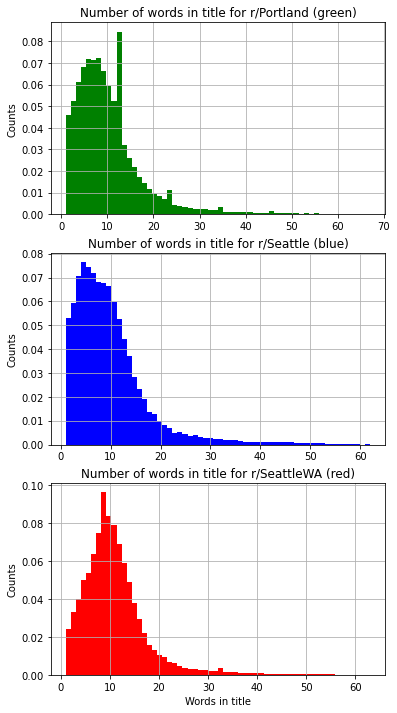

In [17]:
plt.figure(figsize=(6,12))

plt.subplot(3,1,1)
pdx['title_words'].hist(bins = 60, color = 'g', density = True);
plt.title('Number of words in title for r/Portland (green)')
#plt.xlabel('Words in title');
plt.ylabel('Counts');

plt.subplot(3,1,2)
sea['title_words'].hist(bins = 60, color = 'b', density = True);
plt.title('Number of words in title for r/Seattle (blue)')
#plt.xlabel('Words in title');
plt.ylabel('Counts');

plt.subplot(3,1,3)
wa['title_words'].hist(bins = 60, color = 'r', density = True);

plt.title('Number of words in title for r/SeattleWA (red)')
plt.xlabel('Words in title');
plt.ylabel('Counts');

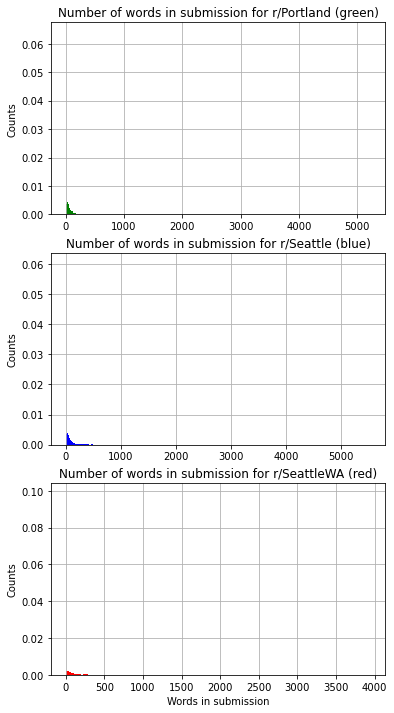

In [18]:
plt.figure(figsize=(6,12))

plt.subplot(3,1,1)
pdx['text_words'].hist(bins = 500, color = 'g',density=True);
plt.title('Number of words in submission for r/Portland (green)')
plt.ylabel('Counts');

plt.subplot(3,1,2)
sea['text_words'].hist(bins = 500, color = 'b',density = True);
plt.title('Number of words in submission for r/Seattle (blue)')
plt.ylabel('Counts');

plt.subplot(3,1,3)
wa['text_words'].hist(bins = 500, color = 'r', density = True);
plt.title('Number of words in submission for r/SeattleWA (red)')
plt.xlabel('Words in submission');
plt.ylabel('Counts');


In [19]:
pdx['text_words'].describe()

count    149895.000000
mean         28.943874
std          82.578067
min           0.000000
25%           1.000000
50%           1.000000
75%          30.000000
max        5224.000000
Name: text_words, dtype: float64

In [20]:
pd.concat([sea,wa])['text_words'].describe()

count    120705.000000
mean         27.023885
std          77.646668
min           0.000000
25%           1.000000
50%           1.000000
75%          19.000000
max        5527.000000
Name: text_words, dtype: float64

There are some differences in the length of both titles and submissions between the groups. We might select some length feature to include in the initial model.   

### Vectorizing text

In [21]:
X = df['fulltext']
y = df['from_seattle']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

In [23]:
%%time

#vectorize first with CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=3000)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

cvdf = pd.DataFrame(X_train_cv.todense(), columns = cv.get_feature_names())

CPU times: user 6.09 s, sys: 973 ms, total: 7.06 s
Wall time: 7.27 s


In [24]:
%%time

#vectorize next with TfidVectorizer
tv = TfidfVectorizer(stop_words='english', max_features=3000)

X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)
tvdf = pd.DataFrame(X_train_tv.todense(), columns = tv.get_feature_names())

CPU times: user 6.29 s, sys: 988 ms, total: 7.28 s
Wall time: 7.6 s


In [25]:
sea = df[df['from_seattle']==1]
pdx = df[df['from_seattle']==0]

sea_cv = cv.fit_transform(sea['fulltext'])
sea_cv_df = pd.DataFrame(sea_cv.todense(), columns = cv.get_feature_names())

pdx_cv = cv.fit_transform(pdx['fulltext'])
pdx_cv_df = pd.DataFrame(pdx_cv.todense(), columns = cv.get_feature_names())



In [26]:
tvdf.sum().sort_values(ascending=False).head(25)

nan           10066.832250
portland       6099.727508
eattle         6032.072231
removed        3573.415568
deleted        2983.869821
just           2707.883045
know           2632.059929
like           2500.347472
city           2330.108880
new            2308.175804
looking        2095.876377
people         2079.527698
oregon         1905.516651
police         1870.964188
good           1804.961375
time           1717.526864
help           1612.347906
don            1581.162952
area           1556.492504
going          1538.204881
day            1477.666926
ve             1457.469435
need           1453.101472
washington     1431.622223
want           1405.580343
dtype: float64

In [27]:
sea_cv_df.sum().sort_values(ascending=False).head(25)

eattle        53230
nan           24600
just          13435
like          13320
people        11872
know          11633
city          11172
new           10146
calendar       8510
event          8508
looking        8503
area           8258
time           8227
don            7974
want           7744
hosted         7484
ve             7300
good           6607
washington     6351
amp            6228
need           5869
police         5856
day            5849
going          5844
help           5723
dtype: int64

In [28]:
pdx_cv_df.sum().sort_values(ascending=False).head(25)

portland    49379
nan         35824
just        21147
like        18965
know        18864
people      15523
looking     12618
don         11514
time        10884
ve          10793
oregon      10678
good         9851
help         9744
want         9704
new          9554
going        9269
need         8863
city         8786
deleted      8755
removed      7897
place        7743
car          7557
work         7433
area         7313
really       7158
dtype: int64

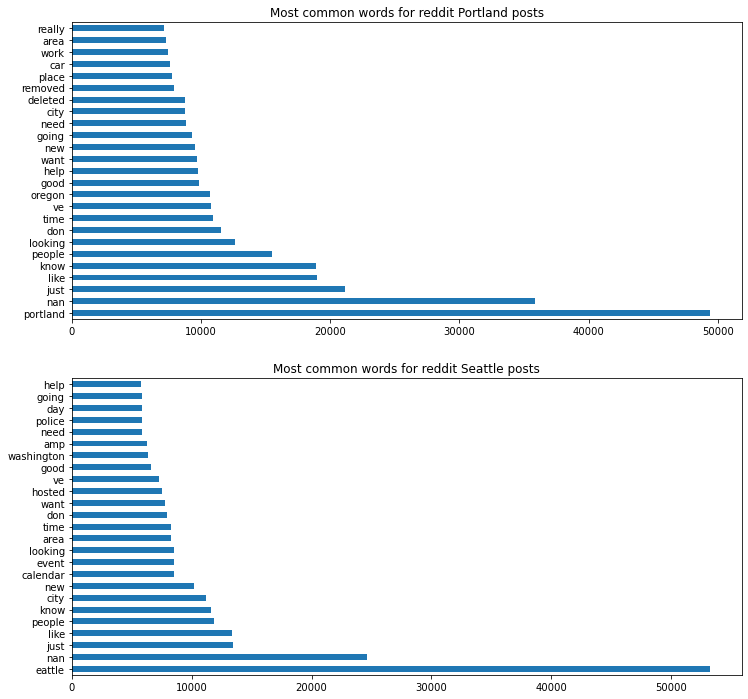

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
pdx_cv_df.sum().sort_values(ascending=False).head(25).plot(kind='barh')
plt.title('Most common words for reddit Portland posts')
plt.subplot(2,1,2)
sea_cv_df.sum().sort_values(ascending=False).head(25).plot(kind='barh');
plt.title('Most common words for reddit Seattle posts');

There are common words that are related to the location like Washington and Oregon.  There are also nan, removed, and deleted that may be unusable information.  

In [30]:
sea_100 = set(sea_cv_df.sum().sort_values(ascending=False).head(100).index)
pdx_100 = set(pdx_cv_df.sum().sort_values(ascending=False).head(100).index)

In [31]:
#words that appear in both top 100 lists
sea_100.intersection(pdx_100)

{'10',
 'amp',
 'area',
 'best',
 'car',
 'city',
 'community',
 'covid',
 'day',
 'days',
 'did',
 'does',
 'don',
 'downtown',
 'feel',
 'food',
 'free',
 'getting',
 'going',
 'good',
 'got',
 'help',
 'home',
 'homeless',
 'house',
 'just',
 'know',
 'let',
 'like',
 'live',
 'll',
 'local',
 'long',
 'looking',
 'lot',
 'love',
 'make',
 'man',
 'nan',
 'near',
 'need',
 'new',
 'night',
 'open',
 'park',
 'people',
 'place',
 'places',
 'police',
 'post',
 'really',
 'removed',
 'right',
 'sure',
 'thanks',
 'things',
 'think',
 'time',
 'today',
 'trying',
 'use',
 've',
 'want',
 'way',
 'week',
 'work',
 'year',
 'years'}

In [32]:
#words that only appear in pdx top 100
pdx_100-sea_100

{'ago',
 'away',
 'bike',
 'buy',
 'come',
 'deleted',
 'didn',
 'dog',
 'doing',
 'friends',
 'great',
 'job',
 'little',
 'look',
 'lost',
 'maybe',
 'money',
 'morning',
 'old',
 'oregon',
 'pdx',
 'person',
 'portland',
 'pretty',
 'said',
 'seen',
 'thank',
 'thing',
 'tonight',
 'town',
 'weekend',
 'wondering'}

In [33]:
#words that only appear in sea top 100
sea_100-pdx_100

{'30',
 'calendar',
 'capitol',
 'chance',
 'chat',
 'cloudy',
 'county',
 'doesn',
 'eattle',
 'event',
 'high',
 'hill',
 'hosted',
 'kids',
 'king',
 'low',
 'month',
 'moving',
 'mph',
 'north',
 'outh',
 'possible',
 'public',
 'rain',
 'recommendations',
 'reddit',
 'state',
 'suggestions',
 'wa',
 'washington',
 'west',
 'wind'}

We see lots of differences when we look at words that appear on the top 100 in only one of the cities.  

Seattle is much more likely to use advice-related words like 'suggestion' and 'recommendations.'  

Portland is much more likely to us purchase-related words like 'buy' and 'money.'  


Seattle also has more references to weather-related words like 'rain', 'cloudy' and 'wind' as well as high occurences of 'chance' and 'mph' which are not conclusively weather related but often used in that context.  



Portland is much more likely to reference friends while Seattle is more likely to reference kids.  Experience tell us that these references may not be positive and sentiment analysis on these may provide more insight.  



Unsurprisingly both locations are more likely to use their own location words like city and state names.  

Also common in both locations are references to hotbutton issues with words like 'covid', 'police', and 'homeless' all being in the top 100 in both cities.    

Both locations also use the words 'free' and 'food' at high rates as well as 'downtown' and 'community.'  

### Sentiment analyzer

In [34]:
df.head()

selftext                                              title          author  \
0      NaN  Driver in Summer Taylor vehicular homicide cas...  OnlineMemeArmy   
1      NaN  Another stormy day brings high winds, landslid...  OnlineMemeArmy   
2      NaN  Gender-fluid dancer breaks barriers at Pacific...  OnlineMemeArmy   
3      NaN  Logistics proving to be biggest challenge for ...  OnlineMemeArmy   
4      NaN  Tribes, preservation societies join lawsuit to...  OnlineMemeArmy   

       id  r_seattlewa  r_portland  from_seattle  from_portland  \
0  kr0hh7            0           0             1              0   
1  kr0grd            0           0             1              0   
2  kr0dx9            0           0             1              0   
3  kr0c3t            0           0             1              0   
4  kr0b0m            0           0             1              0   

                                            fulltext  title_length  \
0  Driver in ummer Taylor vehicular homicide case...           108   
1  Another stormy day brings high winds, landslid...            70   
2  Gender-fluid dancer breaks barriers at Pacific...            74   
3  Logistics proving to be biggest challenge for ...            88   
4  Tribes, preservation societies join lawsuit to...            80   

   text_length  total_length  title_words  text_words  fulltext_words  
0            3           111           17           1              17  
1            3            73           11           1              11  
2            3            77           10           1              10  
3            3            91           11           1              11  
4            3            83           11           1              11

In [35]:
%%time


corpus = list(sea['fulltext'])
sentiment = []
sia = SentimentIntensityAnalyzer()  

for post in corpus:
    scores = sia.polarity_scores(post)
    scores['text'] = post  #adding a key to the dictionary we get from polarity score
    sentiment.append(scores)

sent_df = pd.DataFrame(sentiment)  #turning the dictionary into a data frame
sent_df.head()

CPU times: user 34.8 s, sys: 131 ms, total: 35 s
Wall time: 35 s


neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.174  0.826  0.000   -0.2732   
2  0.000  1.000  0.000    0.0000   
3  0.000  0.885  0.115    0.0772   
4  0.124  0.523  0.353    0.5423   

                                                text  
0  Driver in ummer Taylor vehicular homicide case...  
1  Another stormy day brings high winds, landslid...  
2  Gender-fluid dancer breaks barriers at Pacific...  
3  Logistics proving to be biggest challenge for ...  
4  Tribes, preservation societies join lawsuit to...

In [36]:
%%time 


corpus2 = list(wa['fulltext'])
sentiment2 = []
sia = SentimentIntensityAnalyzer()  

for post in corpus2:
    scores = sia.polarity_scores(post)
    scores['text'] = post  #adding a key to the dictionary we get from polarity score
    sentiment2.append(scores)

sent_df2 = pd.DataFrame(sentiment2)  #turning the dictionary into a data frame
sent_df2.head()


CPU times: user 16.9 s, sys: 51.3 ms, total: 17 s
Wall time: 17 s


neg    neu    pos  compound  \
0  0.039  0.827  0.133    0.6966   
1  0.000  0.903  0.097    0.6996   
2  0.268  0.732  0.000   -0.2960   
3  0.000  0.781  0.219    0.6808   
4  0.000  1.000  0.000    0.0000   

                                                text  
0  What Stand Alone Long Term Care Insurance Opti...  
1  SELLING : Hasan Minhaj’s show on Nov 13th @ 7 ...  
2  Still missing since September 14th quiera bill...  
3  21[F4A] New here. I’m a single mom looking for...  
4                                    Turn signalsnan

In [37]:
%%time 

corpus3 = list(pdx['fulltext'])
sentiment3 = []
sia = SentimentIntensityAnalyzer()  

for post in corpus3:
    scores = sia.polarity_scores(post)
    scores['text'] = post  #adding a key to the dictionary we get from polarity score
    sentiment3.append(scores)

sent_df3 = pd.DataFrame(sentiment3)  #turning the dictionary into a data frame
sent_df3.head()

CPU times: user 47.3 s, sys: 179 ms, total: 47.5 s
Wall time: 47.6 s


neg    neu    pos  compound  \
0  0.089  0.842  0.069    0.3016   
1  0.038  0.896  0.066    0.3182   
2  0.000  1.000  0.000    0.0000   
3  0.000  1.000  0.000    0.0000   
4  0.000  1.000  0.000    0.0000   

                                                text  
0  Did anyone else see the massive meteor at midn...  
1  WEEKLY /R/PORTLAND CLAIFIED: eptember 10, 2017...  
2  Columbia River Gorge - ept 2012 &amp; ept 2017...  
3  Nickleball rules needed; literally only availa...  
4                        Raining Megathread[removed]

In [38]:
sent_df['from_seattle'] = 1
sent_df2['from_seattle'] = 1
sent_df3['from_seattle']= 0

full_sent = pd.concat([sent_df,sent_df2, sent_df3])

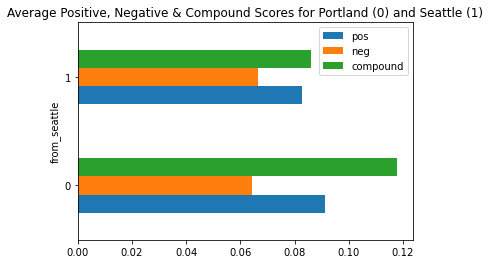

In [39]:
full_sent.groupby('from_seattle').mean()[['pos', 'neg', 'compound']].plot(kind='barh')
plt.title('Average Positive, Negative & Compound Scores for Portland (0) and Seattle (1)');

Sentiment does not help us distinguish between Seattle and Portland groups.  

## Saving cleaned combined dataframe

In [40]:
df.columns

Index(['selftext', 'title', 'author', 'id', 'r_seattlewa', 'r_portland',
       'from_seattle', 'from_portland', 'fulltext', 'title_length',
       'text_length', 'total_length', 'title_words', 'text_words',
       'fulltext_words'],
      dtype='object')

In [41]:
df.isna().sum()

selftext          159459
title                  0
author                 0
id                     0
r_seattlewa            0
r_portland             0
from_seattle           0
from_portland          0
fulltext               0
title_length           0
text_length            0
total_length           0
title_words            0
text_words             0
fulltext_words         0
dtype: int64

In [42]:
df.fillna(' ',inplace = True)

In [43]:
#dealing with filesize limitations so we split up the dataframe into two files
df1 = df[df['from_seattle']==1]
df2 = df[df['from_seattle']==0]
df1.to_csv('./data/sea_df_cleaned.csv', index=False)
df2.to_csv('./data/pdx_df_cleaned.csv', index=False)

In [44]:
df2.value_counts('from_seattle', normalize=True)

from_seattle
0    1.0
dtype: float64

In [45]:
df.isna().sum()

selftext          0
title             0
author            0
id                0
r_seattlewa       0
r_portland        0
from_seattle      0
from_portland     0
fulltext          0
title_length      0
text_length       0
total_length      0
title_words       0
text_words        0
fulltext_words    0
dtype: int64

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149895 entries, 0 to 149894
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   selftext        149895 non-null  object
 1   title           149895 non-null  object
 2   author          149895 non-null  object
 3   id              149895 non-null  object
 4   r_seattlewa     149895 non-null  int64 
 5   r_portland      149895 non-null  int64 
 6   from_seattle    149895 non-null  int64 
 7   from_portland   149895 non-null  int64 
 8   fulltext        149895 non-null  object
 9   title_length    149895 non-null  int64 
 10  text_length     149895 non-null  int64 
 11  total_length    149895 non-null  int64 
 12  title_words     149895 non-null  int64 
 13  text_words      149895 non-null  int64 
 14  fulltext_words  149895 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 18.3+ MB


### Next steps

Now that the data has been cleaned we can move on to our [modeling](./04-modeling.ipynb) notebook.